Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data = np.load("hw1_p1.npy")
type(data)
#print("The shape of the (x, y) pairs is {0}".format(data.shape))
print(f"The shape of the (x, y) pairs is {data.shape}")

The shape of the (x, y) pairs is (1000, 2)


Visualization of data and basis functions

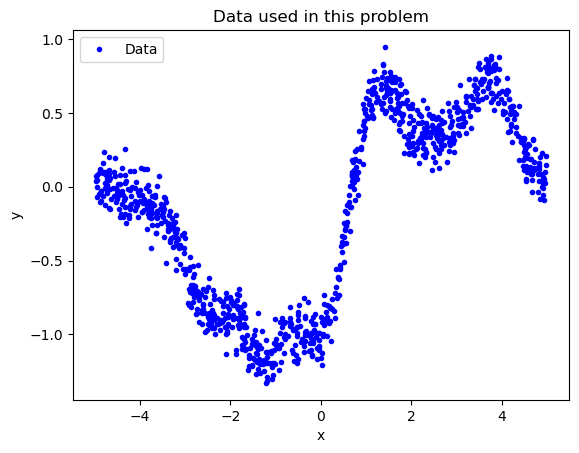

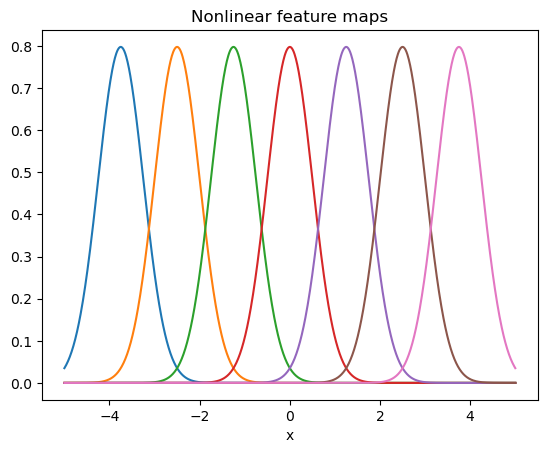

In [3]:
# The data and nonlinear feature maps used in this problem
plt.figure()
plt.plot(data[:,0], data[:,1], 'b.', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data used in this problem')
plt.legend()
plt.show()

#visualization of basis function over [-5, 5]
print()
plt.figure()
x = np.linspace(-5, 5, num=1000)
for m in range(7):
  mu = 1.25 * m - 3.75
  sigma = np.sqrt(0.25)
  basis = norm.pdf(x, mu, sigma)
  plt.plot(x, basis)
plt.xlabel("x")
plt.title("Nonlinear feature maps")
plt.show()

3. Use the data, calculate the eigenvalues of the Hessian matrix and provide the numerical upper bound of ε for this problem

> Hessian matrix = $\phi\phi^{T}$

> Numerical Upper bound of learning rate ε ia : $\frac{2}{\lambda_{max}}$, $\lambda_{max}$ is the largest eigenvalue of the Hessian matrix



In [4]:
x = data[:, 0]  # input data
y = data[:, 1]  # output data

M = 7           # number of basis functions
N = x.shape[0]  # number of samples
Phi = np.zeros((M, N))

# create nonlinear feature maps
for m in range(M):
  mu = 1.25 * m - 3.75
  sigma = np.sqrt(0.25)
  basis = norm.pdf(x, mu, sigma)
  Phi[m, :] = basis

# Hessian
H = Phi.dot(Phi.T)

# largest eigen values corresponds to the upper bound
w, _ = np.linalg.eigh(H)
lambda_max = w[-1]
print(f'The max eigenvalue of H is {lambda_max:.4f}\n')

# numerical upper bound of learning rate:
upper_bound = 2 / lambda_max
print(f'The numerical upperbound of learning rate is {upper_bound:.4f}\n')

The max eigenvalue of H is 79.6374

The numerical upperbound of learning rate is 0.0251



In [11]:
print(Phi.shape)
print(w.shape)
print(y.shape)

(7, 1000)
(7, 1)
(1000,)


4. Set ε = $\frac{1}{\lambda_{max}}$, run the gradient descent updates for 1000 steps. log the loss value as well as the norm-squared of the gradient as a function of number of steps.

> Provide the following two plots as part of your write-up (log values):

1.   Loss as a function of number of iterations.  $loss = \frac{1}{2}\left\| \phi^{T}w - y \right\|^{2}$

2.   The logarithm of norm-squared of the loss compared with the logarithm of the convergence upper bound
$$gradient = \phi\phi^{T}w - \phi y $$

$$ \left\| g_{m} \right\|^{2} \le \frac{2 \lambda_{max}(loss(w^{(0)}) - loss(w^{*}))}{t+1}$$ $t$ denotes the iterations starting from $t = 0$.




In [10]:
def gradient_update(Phi, w,  y,  lr):
  """
  M : number of dimension
  N : number of samples
  Phi: M by N
  w : M by 1 weights vector
  y : N by 1 obeservation
  lr : learning rate
  """
  gradient = np.matmul(Phi, Phi.T).dot(w) - Phi.dot(y)
  w_update = w - lr * gradient

  return w_update, gradient


def loss(Phi, w, y):
  """
  M : number of dimension
  N : number of samples
  Phi: M by N
  w : M by 1 weights vector
  y : N by 1 obeservation
  """
  error = np.matmul(Phi.T, w) - y
  L2_norm = .5 * (error * error)[:,0].sum()

  return L2_norm


w0 = np.random.randn(M, 1)
lr = round(1 / lambda_max, 4)
w = w0
loss_values = np.zeros(1000)
gradient_norm_squared = np.ones(1000)
gradient_norm_upperbound = np.ones(1000)

for t in range(1000):

  # loss value
  L = loss(Phi, w, y[:, np.newaxis])

  # gradient update
  w_update, gradient = gradient_update(Phi, w, y[:, np.newaxis], lr)
  w = w_update

  # store values
  loss_values[t] = L
  gradient_norm_squared[t] = (gradient * gradient)[:, 0].sum()
  gradient_norm_upperbound[t] = 2*lambda_max*(loss_values[0] - loss_values[-1])/(t+1)

print(w_update.shape)

(7, 1)


Loss value, gradient norm squared per iter

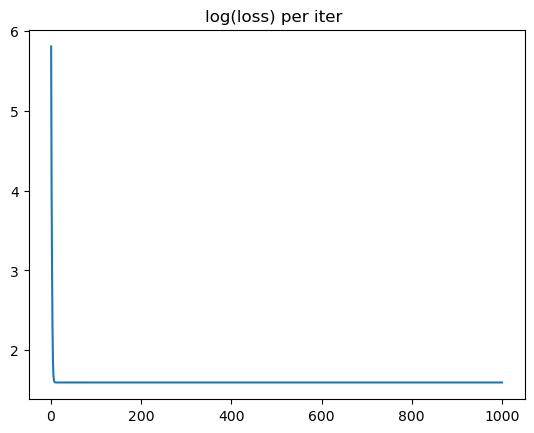

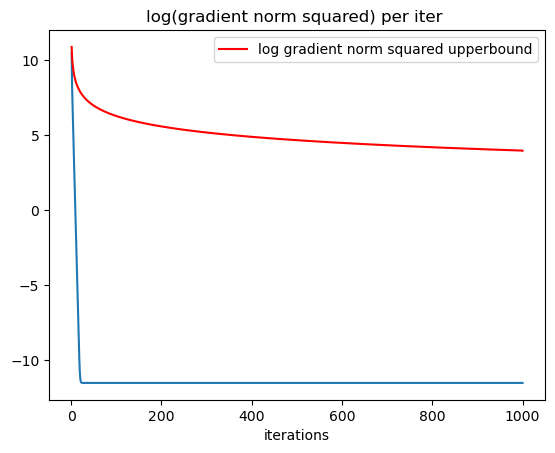

In [6]:
# Log the values
log_loss_values = np.log(loss_values + 1e-5)
log_gradient_norm_squared = np.log(gradient_norm_squared + 1e-5)
log_gradient_norm_upperbound = np.log(gradient_norm_upperbound + 1e-5)

# log loss
plt.figure()
plt.plot(np.arange(1,1000+1), log_loss_values)
plt.title('log(loss) per iter ')
plt.show()
print()

# log gradient norm squared and its upper bound
plt.figure()
plt.plot(np.arange(1, 1000+1), log_gradient_norm_squared)
plt.plot(np.arange(1, 1000+1), log_gradient_norm_upperbound, 'r', label='log gradient norm squared upperbound')
plt.title('log(gradient norm squared) per iter ')
plt.xlabel('iterations')
plt.legend()
plt.show()

5. Plot the data, as well as the optimized regression curve

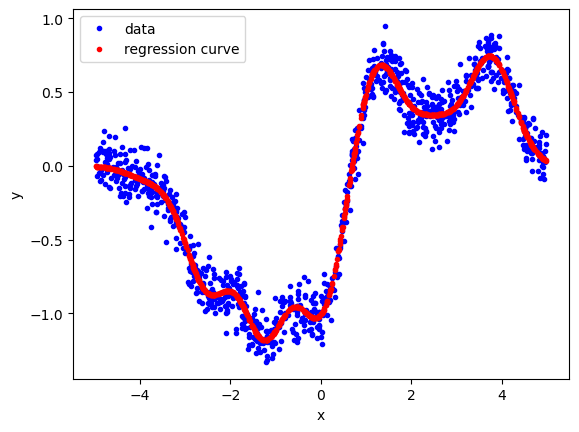

In [7]:
# plot the data and optimized regression curve
y_predict = np.matmul(Phi.T, w)[:,0]
plt.figure()
plt.plot(x, y, 'b.', label='data')
plt.plot(x, y_predict, 'r.', label='regression curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()